# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [5]:
riskFactors<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")

In [6]:
riskFactors.exp <- riskFactors[rep(row.names(riskFactors), riskFactors$count), 1:12]

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [7]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras: 
riskFactors.m <- riskFactors.exp[ sample( 1:nrow( riskFactors.exp ), 5000 ), ]

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [8]:
cols <- c(3:12)
riskFactors.m[cols] <- lapply(riskFactors.m[cols],function(x){return(replace(x,x==9,NA))})

In [9]:
cols <- c(2:12)
riskFactors.m[cols] <- lapply(riskFactors.m[cols],factor)

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [10]:
riskFactors.m$edad.estimada<-0
indices <- which(riskFactors.m$age_group_5_years==1)
riskFactors.m[indices,]$edad.estimada <- mean(18:29)
indices <- which(riskFactors.m$age_group_5_years==2)
riskFactors.m[indices,]$edad.estimada <- mean(30:34)
indices <- which(riskFactors.m$age_group_5_years==3)
riskFactors.m[indices,]$edad.estimada <- mean(35:39)
indices <- which(riskFactors.m$age_group_5_years==4)
riskFactors.m[indices,]$edad.estimada <- mean(40:44)
indices <- which(riskFactors.m$age_group_5_years==5)
riskFactors.m[indices,]$edad.estimada <- mean(45:49)
indices <- which(riskFactors.m$age_group_5_years==6)
riskFactors.m[indices,]$edad.estimada <- mean(50:54)
indices <- which(riskFactors.m$age_group_5_years==7)
riskFactors.m[indices,]$edad.estimada <- mean(55:59)
indices <- which(riskFactors.m$age_group_5_years==8)
riskFactors.m[indices,]$edad.estimada <- mean(60:64)
indices <- which(riskFactors.m$age_group_5_years==9)
riskFactors.m[indices,]$edad.estimada <- mean(65:69)
indices <- which(riskFactors.m$age_group_5_years==10)
riskFactors.m[indices,]$edad.estimada <- mean(70:74)
indices <- which(riskFactors.m$age_group_5_years==11)
riskFactors.m[indices,]$edad.estimada <- mean(75:79)
indices <- which(riskFactors.m$age_group_5_years==12)
riskFactors.m[indices,]$edad.estimada <- mean(80:84)
indices <- which(riskFactors.m$age_group_5_years==13)
riskFactors.m[indices,]$edad.estimada <-90


¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

Coprobamos que ambos subconjuntos no siguen una distribución normal, en ambos casos el p-valor es muy bajo

In [11]:
edad.estimada.sin.antecedentes <- na.omit(riskFactors.m[riskFactors.m$first_degree_hx==0,]$edad.estimada)
edad.estimada.con.antecedentes <- na.omit(riskFactors.m[riskFactors.m$first_degree_hx==1,]$edad.estimada)

shapiro.test(edad.estimada.sin.antecedentes)
shapiro.test(edad.estimada.con.antecedentes)


	Shapiro-Wilk normality test

data:  edad.estimada.sin.antecedentes
W = 0.95975, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  edad.estimada.con.antecedentes
W = 0.96961, p-value = 3.04e-11


Dado que no es una distribución normal, utilizamos el test Kruskal-wallis para comparar la media de ambas distribuciones. Como el p-valor es muy bajo, tenemos que rechazar la hipotesis nula y concluir que las medias de ambos conjuntos son diferentes.

In [12]:
kruskal.test( edad.estimada ~ first_degree_hx, data=riskFactors.m)


	Kruskal-Wallis rank sum test

data:  edad.estimada by first_degree_hx
Kruskal-Wallis chi-squared = 22.295, df = 1, p-value = 2.338e-06


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

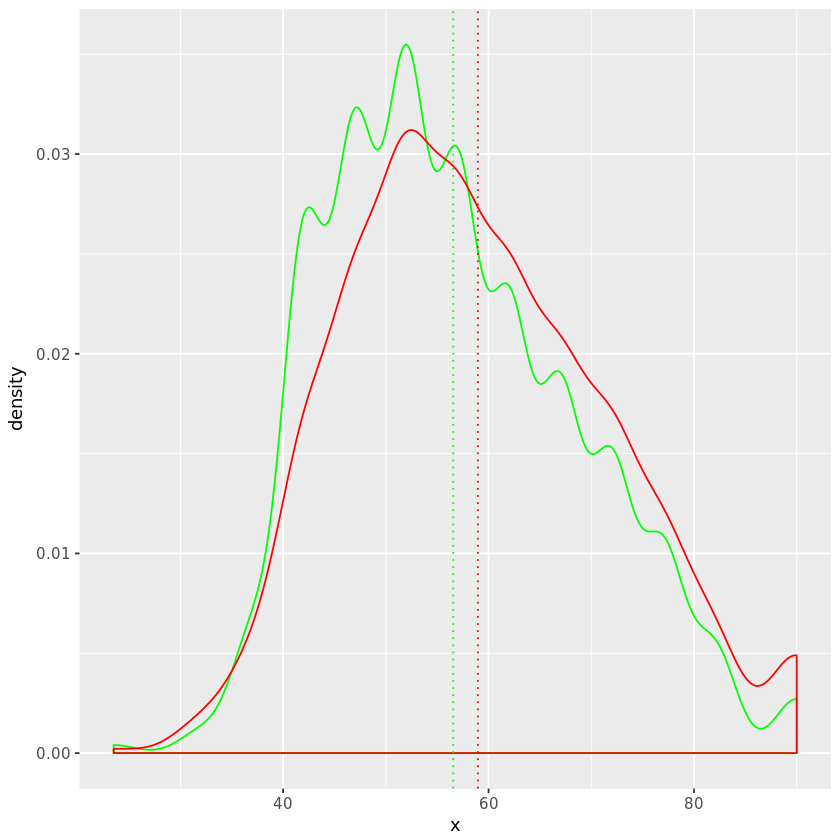

In [13]:
library("ggplot2")
ggplot() + geom_density(data=data.frame(x=edad.estimada.sin.antecedentes), aes(x),color="green") +
    geom_density(data=data.frame(x=edad.estimada.con.antecedentes), aes(x),color="red") +
    geom_vline(xintercept = mean(edad.estimada.sin.antecedentes),color="green", linetype="dotted") +
    geom_vline(xintercept = mean(edad.estimada.con.antecedentes),color="red", linetype="dotted")

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

In [14]:
df.birads <- na.omit(data.frame(edad=riskFactors.m$edad.estimada,birads=riskFactors.m$BIRADS_breast_density))

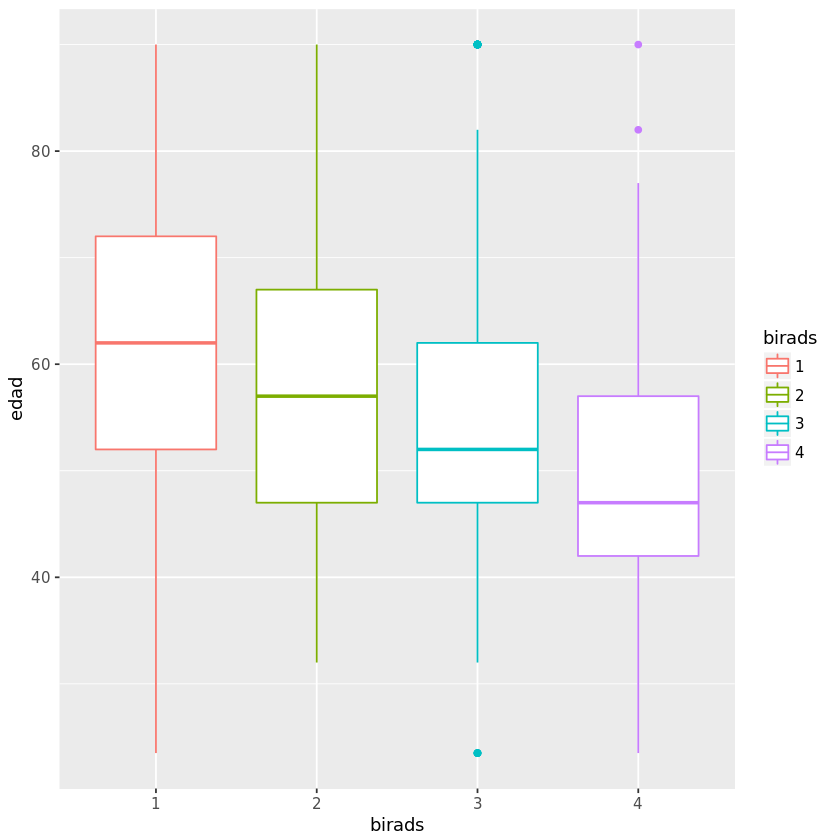

In [15]:
ggplot(data=df.birads,aes(x=birads,y=edad,color=birads))+geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

Primero aplicamos el test de shapiro a ver si las distribuciones siguen una distribución normal. Coprobamos por el p-valor que podemos asumir que no siguen una distribució normal, por lo que para compararlas tenemos que realizar un test de kruskal-Wallis.

In [16]:
shapiro.test(df.birads[df.birads$birads==1,]$edad)
shapiro.test(df.birads[df.birads$birads==2,]$edad)
shapiro.test(df.birads[df.birads$birads==3,]$edad)
shapiro.test(df.birads[df.birads$birads==4,]$edad)


	Shapiro-Wilk normality test

data:  df.birads[df.birads$birads == 1, ]$edad
W = 0.97787, p-value = 0.0001488



	Shapiro-Wilk normality test

data:  df.birads[df.birads$birads == 2, ]$edad
W = 0.96388, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df.birads[df.birads$birads == 3, ]$edad
W = 0.95387, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df.birads[df.birads$birads == 4, ]$edad
W = 0.93281, p-value = 2.147e-09


Con el test podemos concluir que las medias de los conjuntos no son iguales como ya se veia en el boxplot 

In [17]:
kruskal.test( edad ~ birads, data=df.birads)


	Kruskal-Wallis rank sum test

data:  edad by birads
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

No todos los tipos de cancer son igual de probables, podemos observarlo en la tabla de conteos y comprobarlo con el test chi cuadrado

In [18]:
observed <-table(df.birads$birads)
observed
chisq.test(observed)


   1    2    3    4 
 297 1665 1451  256 


	Chi-squared test for given probabilities

data:  observed
X-squared = 1816.3, df = 3, p-value < 2.2e-16


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

Si observamos la tabla de frecuencias, el mas comun es el tipo 2, aunque no tiene mucha diferencia con el tipo 3.Con el test Chi cuadrado comprobamos que el tipo 2 es significativamente mas probable que el de tipo 3

In [19]:
chisq.test(table(df.birads$birads)[2:3])


	Chi-squared test for given probabilities

data:  table(df.birads$birads)[2:3]
X-squared = 14.697, df = 1, p-value = 0.0001262


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

Realizamos un test de independencia con el test chi cuadrado, y como el p-valor es elevado, aceptamos la hipotesis nula, que las variables son independientes, el tipo de cancer no depende de si has tenido antecedentes familiares

In [20]:
df1 <- data.frame(antecedentes=riskFactors.m$first_degree_hx, tipo=riskFactors.m$BIRADS_breast_density)
t1 <- table(na.omit(df1))
t1
chisq.test(t1)


            tipo
antecedentes    1    2    3    4
           0  223 1324 1135  190
           1   56  248  229   45


	Pearson's Chi-squared test

data:  t1
X-squared = 4.2475, df = 3, p-value = 0.236


¿Depende el tipo de cancer BIRADS del grupo étnico?

realizamos el mismo test que en el caso anterior, pero en esta ocasión el p-valor es muy bajo, por lo que podemos asumir que hay relación entre los tipos de cancer y el grupo etnico

In [21]:
t2 <- table(na.omit(data.frame(Grupo.Etnico=riskFactors.m$race_eth, tipo=riskFactors.m$BIRADS_breast_density)))
t2
chisq.test(t2)

            tipo
Grupo.Etnico    1    2    3    4
           1  204 1208 1021  179
           2   23  100   92   11
           3   11   51   85   29
           4    1    7    6    3
           5   26   98   94   11
           6    2   19   15    3

Warning message in chisq.test(t2):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  t2
X-squared = 48.684, df = 15, p-value = 1.971e-05


¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

Nativo americano = 4
Almost entirely fat = 1

In [22]:
ns <- t2[4,1]
n <- sum(t2)
binom.test(ns,n)

[1] "P(Native American,Almost enterrly fat)= 0.000303122158229767"



	Exact binomial test

data:  ns and n
number of successes = 1, number of trials = 3299, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 7.674359e-06 1.687719e-03
sample estimates:
probability of success 
          0.0003031222 


La probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat es de 0.000303122158229767, con un intervalo de confianza del 95% de [7.674359e-06 - 1.687719e-03]